In [23]:
from ecell4 import *
from ecell4.extra import ensemble
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

simrun=5
duration = 1000
rm = 0.05
D=0.1
Nas = 5
nproc=70
L=1#cbrt(10)
k0= 0.1

def singlerun(solver='ode',intrinsic=False,simrun=1):   
    print(solver)
    V = L**3 
    M = max(int(min(cbrt(Nas), L / (2 * rm))), 3)
    if solver=='spa':
        solver=("spatiocyte",rm)
        V=spatiocyte.SpatiocyteWorld.calculate_volume(Real3(L,L,L),rm)
    elif solver=='egfrd':
        solver = ('egfrd', Integer3(M, M, M)) 

    kon=k0/V        
    keff = kon*V*V/Nas
    kd = 4*np.pi*rm*2*D*2
    ka = keff*kd/(kd-keff)
    assert(ka>0)
    with species_attributes():
        A | {'D': D, 'radius':rm}
        B | {'D': D, 'radius':rm}
        
    with reaction_rules():
        ~A > A | kon
        A + B >B | (ka if intrinsic else keff)
    m = get_model()
    
    print('av={:.3},intrinsic={}'.format(float(V),intrinsic))
    print('kon={:.3},koff={:.3},kd={:.3},keff={:.3},kfactor={:.3}'.format(kon,(ka if intrinsic else keff),kd,keff,ka/kd))
    if simrun >1    :
        obs=ensemble.ensemble_simulations(duration,n=simrun, y0={'B':1},model=m, solver=solver,volume=ones()*L,species_list=["A"],return_type='observer',nproc=nproc,method='multiprocessing')#,return_type="observer")
    else:
        obs=run_simulation(duration,model=m,y0={'B':1},return_type='observer',species_list=['A'],solver=solver,volume=ones()*L)
    return obs


obs1=singlerun('ode',False,1)
obs2=singlerun('spa',True,simrun)
#obs3=singlerun('egfrd',True,simrun)

ode
av=1.0,intrinsic=False
kon=0.1,koff=0.02,kd=0.251,keff=0.02,kfactor=0.0865
spa
av=1.66,intrinsic=True
kon=0.0601,koff=0.0383,kd=0.251,keff=0.0333,kfactor=0.153


NameError: name 'obs3' is not defined

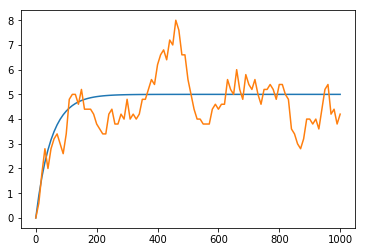

In [24]:
fig=plt.figure()
data1 = np.array(obs1.data()).T
plt.plot(data1[0], data1[1],'-', label='ODE (r={})'.format(rm))
data2 = np.array(obs2.data()).T
plt.plot(data2[0], data2[1],'-', label='spa (r={})'.format(rm))
data3 = np.array(obs3.data()).T
plt.plot(data3[0], data3[1],'-', label='egfrd (r={})'.format(rm))
plt.legend(loc='best',fontsize=20)
fig.set_size_inches(15, 9)
plt.tick_params(labelsize=20)
s=20
plt.xlabel('time',fontsize=s)
plt.ylabel('number of A molecule',fontsize=s)
#plt.title('L={},D={},kd={:3},keff={:3},ka_Spa={:3},ka_eGFRD={:3}'.format(L,D,0.126,0.02,0.025,0.024),fontsize=s)
#plt.savefig('/home/chew/ecellwork/figure/sturrock_birth_death_1')

In [28]:
ka=0
assert(ka>0)

AssertionError: 

In [11]:
assert(ka>0,'sdf')

<ipython-input-11-283ae5568233>:1: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(ka>0,'sdf')


In [16]:
def simplef(x):
    return x**10

ensemble.run_multiprocessing(jobs=,n=5,nproc=5,target=simplef)

ImportError: cannot import name 'run_multiprocessing'